# <font color="#F20400"> NETFLİX SUBSCRIPTIONS FORECASTING

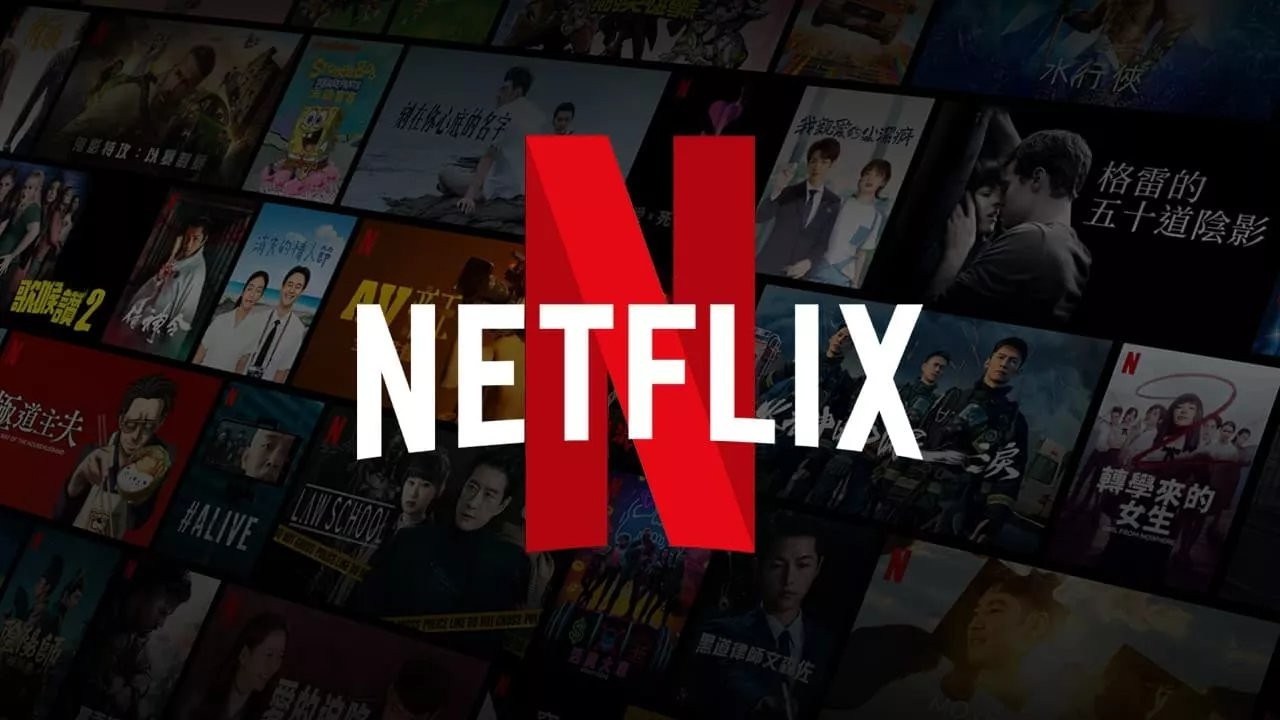

## <font color="#F20400"> AIM
The aim of this project is to analyze the historical subscriber data for Netflix from 2013 to 2023 and build a forecasting model to predict future subscriber trends. By leveraging time series analysis and ARIMA modeling, this project seeks to uncover seasonal patterns and provide accurate forecasts that can aid in strategic decision-making for future growth.

## <font color="#F20400"> Data Explanation
The dataset contains historical subscriber numbers for Netflix over a period of 10 years, starting from 2013 to 2023. Each entry includes:
- **Time Period**: A date representing when the subscriber count was recorded.
- **Subscribers**: The total number of Netflix subscribers (in millions) at the corresponding time period.

## <font color="#F20400"> Requirements

In [101]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

## <font color="#F20400"> Import Data

In [6]:
df=pd.read_csv("Netflix-Subscriptions.csv")

## <font color="#F20400"> EDA (Exploratory Data Analysis)

In [8]:
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [9]:
df.tail()

,Time Period,Subscribers
37,01/07/2022,220670000
38,01/10/2022,223090000
39,01/01/2023,230750000
40,01/04/2023,232500000
41,01/07/2023,238390000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 804.0+ bytes


In [19]:
df.isnull().sum()

Time Period    0
Subscribers    0
dtype: int64

In [39]:
df.shape

(42, 2)

## <font color="#F20400"> Feature Engineering

In [27]:
df['Time Period'] = pd.to_datetime(df['Time Period'], format='%d/%m/%Y')

In [31]:
df["Time Period"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42 entries, 0 to 41
Series name: Time Period
Non-Null Count  Dtype         
--------------  -----         
42 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 468.0 bytes


In [55]:
df["Quarterly Growth Rate"]=df["Subscribers"].pct_change()*100
df["Bar Color"]=df["Quarterly Growth Rate"].apply(lambda x:"green" if x>0 else "red")

In [73]:
df["Year"]=df["Time Period"].dt.year
yearly_growth=df.groupby("Year")["Subscribers"].pct_change().fillna(0)*100
df["Bar Color Year"]=yearly_growth.apply(lambda x:"green" if x>0 else "red" )

In [75]:
df.head()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color,Year,Bar Color Year
0,2013-04-01,34240000,NaN,red,2013,red
1,2013-07-01,35640000,4.088785,green,2013,green
2,2013-10-01,38010000,6.649832,green,2013,green
3,2014-01-01,41430000,8.997632,green,2014,red
4,2014-04-01,46130000,11.344436,green,2014,green


## <font color="#F20400"> Data Visualization

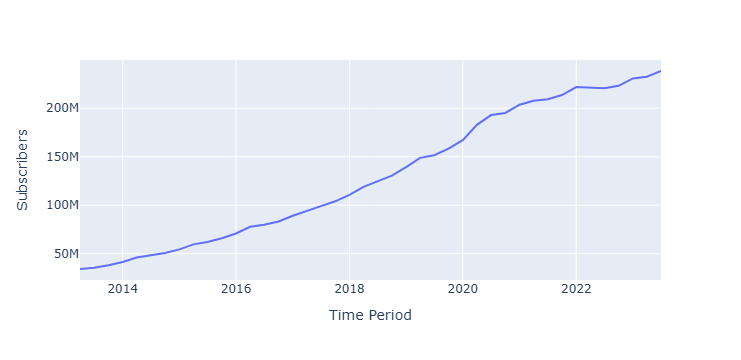

In [29]:
px.line(df,x="Time Period",y="Subscribers")

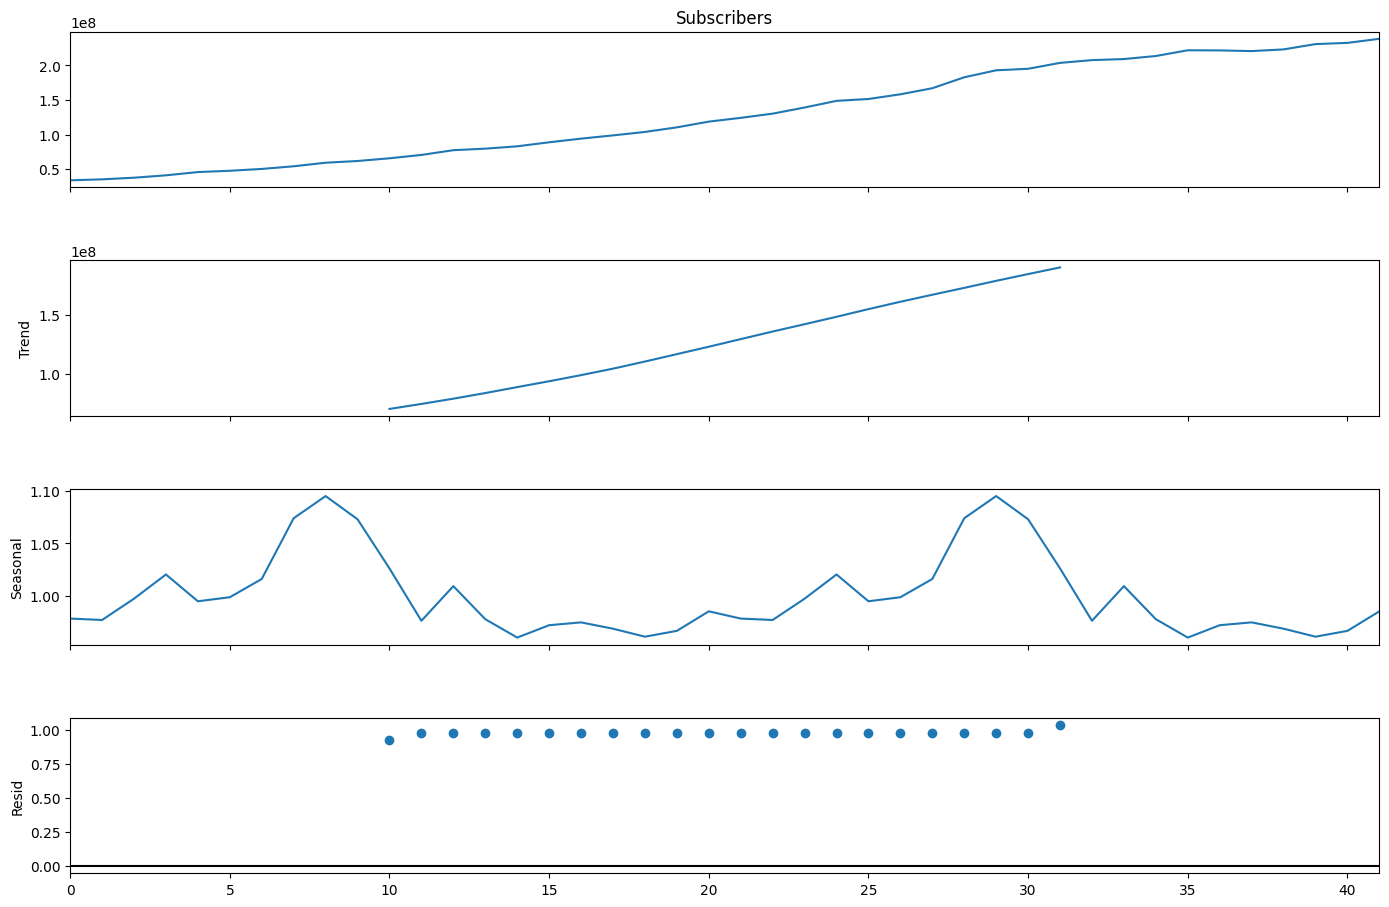

In [41]:
result=seasonal_decompose(df["Subscribers"],model="multiplicative",period=21)
fig=result.plot()
fig.set_size_inches(15,10)

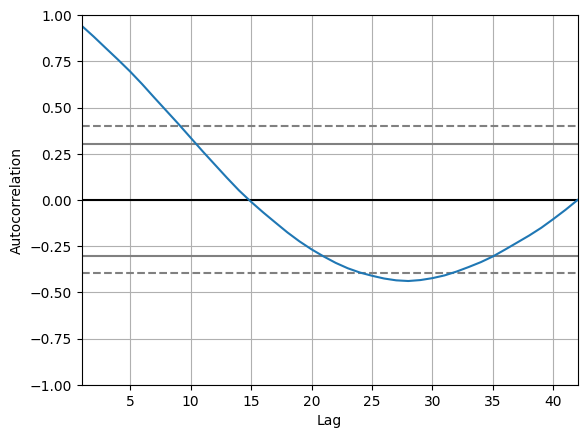

In [45]:
pd.plotting.autocorrelation_plot(df["Subscribers"]);

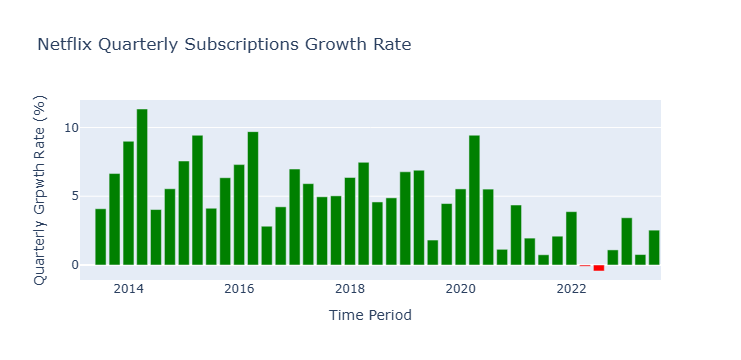

In [71]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=df["Time Period"],
    y=df["Quarterly Growth Rate"],
    marker_color=df["Bar Color"],
    name="Quarterly Growth Rate"
))
fig.update_layout(title="Netflix Quarterly Subscriptions Growth Rate",
                  xaxis_title="Time Period",
                  yaxis_title="Quarterly Grpwth Rate (%)")
fig.show()                

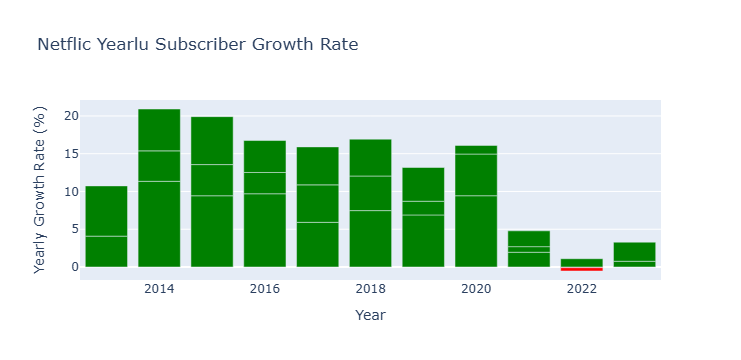

In [77]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=df["Year"],
    y=yearly_growth,
    marker_color=df["Bar Color Year"],
    name="Yearly Growth Rate"
))
fig.update_layout(title="Netflic Yearlu Subscriber Growth Rate",
                 xaxis_title="Year",
                 yaxis_title="Yearly Growth Rate (%)")
fig.show()

## <font color="#F20400"> Modelling 

In [113]:
model=ARIMA(df["Subscribers"],order=(1,1,1))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Thu, 16 Jan 2025   AIC                           1351.986
Time:                        18:06:53   BIC                           1357.127
Sample:                             0   HQIC                          1353.858
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.769      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.000    1.19e+13    1.19e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.96   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.05   Prob(JB):                         0.10
Heteroskedasticity (H):               7.27   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.64e+43. Standard errors may be unstable.
"""

In [115]:
predictions=result.predict(len(df),len(df)+7)
predictions

42    2.433215e+08
43    2.482517e+08
44    2.531806e+08
45    2.581083e+08
46    2.630346e+08
47    2.679598e+08
48    2.728836e+08
49    2.778062e+08
Name: predicted_mean, dtype: float64

<Axes: >

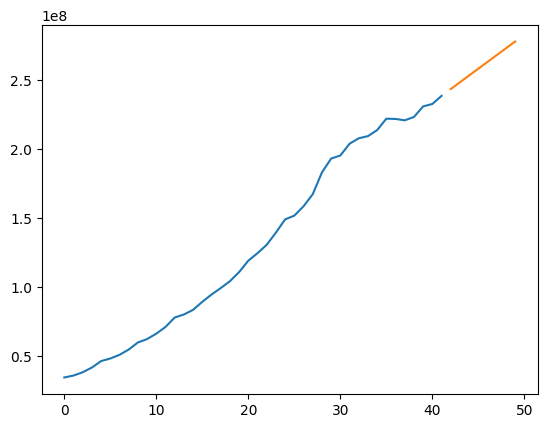

In [117]:
df["Subscribers"].plot()
predictions.plot()

## <font color="#F20400">Results

The forecasting model successfully predicted the next 7 days for Netflix's subscriber numbers, as shown in the graph. The predictions indicate a steady increase in subscriber growth over the forecasted period, with the values approaching nearly **278 million subscribers** by the end of the forecast.

### <font color="#F20400">Predicted Values:
| Forecasted Index | Predicted Subscribers (in millions) |
|------------------|-------------------------------------|
| 42               | 243.32M                            |
| 43               | 248.25M                            |
| 44               | 253.18M                            |
| 45               | 258.11M                            |
| 46               | 263.03M                            |
| 47               | 267.96M                            |
| 48               | 272.88M                            |
| 49               | 277.81M                            |

The visual representation confirms a consistent upward trend, reflecting Netflix's historical growth trajectory. These predictions provide valuable insights for planning and decision-making regarding potential future subscriber growth.

### <font color="#F20400">Graph Analysis:
The blue line in the graph represents the historical data, while the orange line depicts the forecasted values. The smooth continuation of the growth trend suggests the model captures the underlying dynamics of subscriber growth effectively.